## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [1]:
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

import pandas as pd 
df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
print(df.shape)
df.head()

--2019-12-11 04:54:47--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.04s   

2019-12-11 04:54:53 (463 KB/s) - ‘house-votes-84.data’ saved [18171/18171]

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
import numpy as np

df=df.replace({'?':np.NaN, 'n': 0, 'y': 1 })


### Let's calculate confidence intervals for the votes on budget

In [3]:
#Create two samples 
dem=df[df['party']=='democrat']
rep = df[df['party']=='republican']

#Calculate means
print('Democrat mean:', dem['budget'].mean())
print('Republican mean:', rep['budget'].mean())



Democrat mean: 0.8884615384615384
Republican mean: 0.13414634146341464


In [4]:
from scipy import stats 


confidence = 0.95
xbar = dem['budget'].mean()
n = len(dem)
stderr = (np.std(dem['budget'], ddof=1)/np.sqrt(n))
t = stats.t.ppf((1+confidence)/2.0, n-1)
moe=stderr*t

#print(confidence, xbar, n, stderr, t, moe)
print (xbar, xbar+moe, xbar-moe)

0.8884615384615384 0.9264665952085289 0.8504564817145479


In [0]:
#Create a function out of it 
#input: issue, confidence interval 

import matplotlib.pyplot as plt


def confidence_interval (party, issue, CL):
  assert type(CL)==float
  data = df[df['party']==party]
  #print(data.head())
  xbar=data[issue].mean()
  #print(xbar)
  n=len(data[issue])
  #print(n)
  stderr = (np.std(data[issue], ddof=1 )/np.sqrt(n))
  t=stats.t.ppf((1+CL)/2.0, n-1)
  moe=stderr*t


  return (issue, xbar, xbar+moe, xbar-moe)





In [6]:
confidence_interval('democrat', 'budget', 0.95)

('budget', 0.8884615384615384, 0.9264665952085289, 0.8504564817145479)

In [7]:
confidence_interval('republican', 'immigration', 0.95)

('immigration', 0.5575757575757576, 0.6334585953109697, 0.4816929198405456)

###Graphical representation of the confidence intervals

In [8]:
  #melt data 
  wide_data = df.melt(id_vars='party') 
  wide_data.head()
  

,party,variable,value
0,republican,handicapped-infants,0.0
1,republican,handicapped-infants,0.0
2,democrat,handicapped-infants,NaN
3,democrat,handicapped-infants,0.0
4,democrat,handicapped-infants,1.0


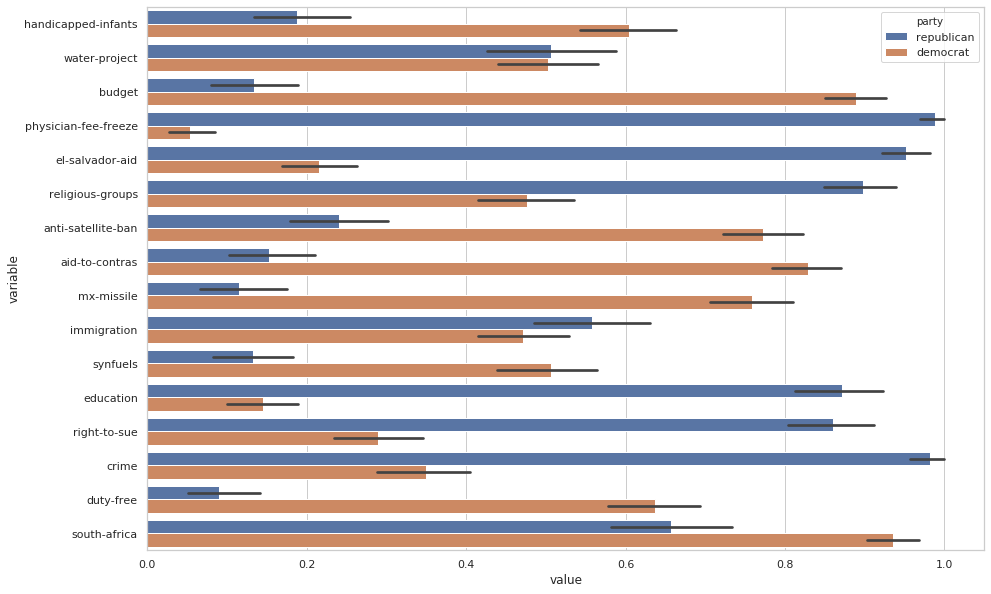

In [9]:
import seaborn as sns 
sns.set(rc={'figure.figsize':(15,10)})
sns.set(style='whitegrid')
ax=sns.barplot(x='value', y='variable', hue='party', data=wide_data)


##Interpretation: 

The smaller MOE, the more confident we are in the mean data we're reporting. 

There are issues, like immigration, where confidernce intervals for republican and democrat votes are overlapping -- that's where we cannot say that there's a higher support from one party for the issue

###Chi *square* stuff

In [10]:
#Load data from class
 df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [38]:
#creare a categorical variable for hours per week worked

df.describe()
cut_points = [0,9,19,29,39,49,100]
label_names=['0-9', '10-19', '20-29', '30-39', '40-49', '50+']

pd.cut(df['hours-per-week'], cut_points, labels=label_names)
df['hours']= pd.cut(df['hours-per-week'], cut_points, labels=label_names)
df.head()
df.shape

(32561, 16)

In [12]:
crosstab = pd.crosstab(df['workclass'], df['hours'])
crosstab

hours,0-9,10-19,20-29,30-39,40-49,50+
workclass,,,,,,
Federal-gov,8,14,23,40,739,136
Local-gov,15,57,105,250,1303,363
Never-worked,1,1,0,2,3,0
Private,199,798,1643,2525,13508,4023
Self-emp-inc,5,15,39,74,391,592
Self-emp-not-inc,57,102,178,297,894,1013
State-gov,10,74,96,187,746,185
Without-pay,0,3,4,1,2,4


###Calculate automatically:

```
# This is formatted as code
```



In [13]:

chi_squared, p_value, dof, expected = stats.chi2_contingency(crosstab)


print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 1871.6298067141156
P-value: 0.0
Degrees of Freedom: 35
Expected: 
 [[9.21724980e+00 3.32445891e+01 6.52393816e+01 1.05482832e+02
  5.49473068e+02 1.97342880e+02]
 [2.00955248e+01 7.24801302e+01 1.42235443e+02 2.29974548e+02
  1.19796576e+03 4.30248592e+02]
 [6.72091131e-02 2.42408462e-01 4.75703824e-01 7.69145647e-01
  4.00657445e+00 1.43895850e+00]
 [2.17911147e+02 7.85957494e+02 1.54236771e+03 2.49378994e+03
  1.29904591e+04 4.66551460e+03]
 [1.07150529e+01 3.86468348e+01 7.58407811e+01 1.22623792e+02
  6.38762441e+02 2.29411098e+02]
 [2.43969081e+01 8.79942718e+01 1.72680488e+02 2.79199870e+02
  1.45438653e+03 5.22341937e+02]
 [1.24624898e+01 4.49494548e+01 8.82090806e+01 1.42621579e+02
  7.42933377e+02 2.66824020e+02]
 [1.34418226e-01 4.84816924e-01 9.51407648e-01 1.53829129e+00
  8.01314890e+00 2.87791701e+00]]


Based on a p-value 0, we fail to reject the null hypothesis. 

###Calculate manually

In [25]:
pd.crosstab(df['sex'], df['workclass'], margins=True)


workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
sex,,,,,,,,,
Female,315,835,2,7752,135,399,489,5,9932
Male,645,1258,5,14944,981,2142,809,9,20793
All,960,2093,7,22696,1116,2541,1298,14,30725


In [0]:
#Make arrays with actual numbers: 

crosstab=pd.crosstab(df['sex'], df['workclass'], margins=True)



In [28]:
#Grab observed values as arrays: 

femalecount = crosstab.iloc[0][0:8].values
femalecount

array([ 315,  835,    2, 7752,  135,  399,  489,    5])

In [29]:
malecount = crosstab.iloc[1][0:8].values
malecount

array([  645,  1258,     5, 14944,   981,  2142,   809,     9])

In [35]:
#Make expected value table 

row_sums = crosstab.iloc[0:3,8]
row_sums

sex
 Female     9932
 Male      20793
All        30725
Name: All, dtype: int64

In [33]:
col_sums=crosstab.iloc[2, 0:9]
col_sums

workclass
 Federal-gov           960
 Local-gov            2093
 Never-worked            7
 Private             22696
 Self-emp-inc         1116
 Self-emp-not-inc     2541
 State-gov            1298
 Without-pay            14
All                  30725
Name: All, dtype: int64

In [39]:
total=df.shape[0]
total

32561

In [40]:
#Calculate table of expected values
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val=column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
expected

array([[2.92826387e+02, 6.38422530e+02, 2.13519241e+00, 6.92290384e+03,
        3.40410675e+02, 7.75074844e+02, 3.95925678e+02, 4.27038482e+00,
        9.37196953e+03],
       [6.13042597e+02, 1.33656058e+03, 4.47010227e+00, 1.44933487e+04,
        7.12662019e+02, 1.62264712e+03, 8.28884678e+02, 8.94020454e+00,
        1.96205560e+04],
       [9.05868984e+02, 1.97498311e+03, 6.60529468e+00, 2.14162526e+04,
        1.05307269e+03, 2.39772197e+03, 1.22481036e+03, 1.32105894e+01,
        2.89925256e+04]])

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)